In [96]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [97]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [98]:

df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()


(100, 6)


,col1,col2,col3,col4,col5,target
0,1.149020,-2.096067,0.818761,-1.490166,0.602816,1
1,-0.716601,-1.725575,-2.059823,-0.490976,0.937229,0
2,-0.314320,-2.433341,-3.320475,0.607760,2.735080,0
3,1.445690,-0.423587,2.256406,-1.824364,0.794369,1
4,-2.430117,0.184091,-0.877027,-1.460023,1.146417,0


In [99]:
#funtion for the row sampling
def sample_rows(df,percent):
  return df.sample(int(percent* df.shape[0]),replace = True)

In [136]:

# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df.loc[:,cols]
  new_df['target'] = df['target']
  return new_df


6

In [101]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)


In [102]:
cols = random.sample(df.columns.tolist()[:-1],int(1.0*(df.shape[1]-1)))  # not including target columns

In [103]:
cols

['col3', 'col1', 'col2', 'col4', 'col5']

# now let's create the different data uding row sampeling

In [104]:
df1 = sample_rows(df,0.25)
df1.shape

(25, 6)

In [105]:
df2 = sample_rows(df,0.25)

In [106]:
df3 = sample_rows(df,0.25)

# Now train the model on different data

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [115]:
df1.head(2)

,col1,col2,col3,col4,col5,target
37,0.312866,-0.620535,0.303031,-0.175507,1.695061,1
32,0.914940,-0.800086,0.314470,0.212021,1.243324,1


In [118]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

# Now plot the tree

In [119]:
from sklearn.tree import plot_tree

[Text(0.3333333333333333, 0.9, 'x[0] <= -0.001\ngini = 0.48\nsamples = 25\nvalue = [10, 15]'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.5, 0.7, 'x[4] <= -0.009\ngini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.5, 'x[2] <= -0.808\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.5, 0.3, 'x[3] <= -0.067\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]')]

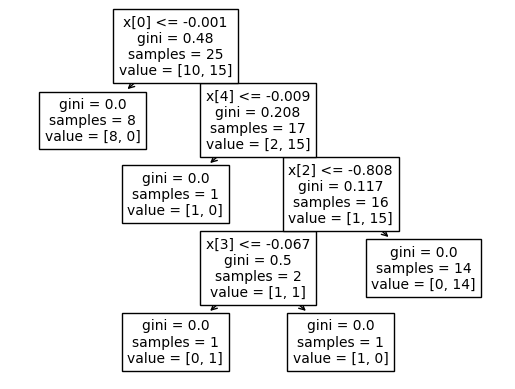

In [120]:
plot_tree(clf1)

[Text(0.5, 0.8333333333333334, 'x[0] <= -0.349\ngini = 0.461\nsamples = 25\nvalue = [9, 16]'),
 Text(0.25, 0.5, 'x[2] <= 2.635\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x[4] <= -0.807\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]')]

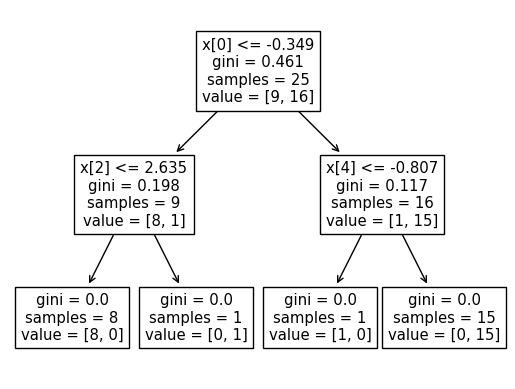

In [121]:
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[2] <= -0.226\ngini = 0.365\nsamples = 25\nvalue = [6, 19]'),
 Text(0.4, 0.5, 'x[0] <= 0.42\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]')]

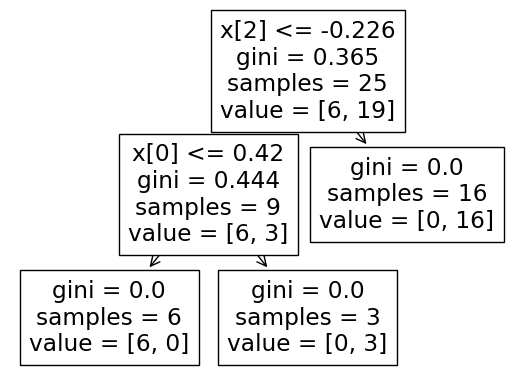

In [122]:
plot_tree(clf3)

In [145]:
input_data = np.array([1.450844, 0.415184, -0.794947, 1.014587, 2.082256]).reshape(1, -1)

In [146]:
input_data

array([[ 1.450844,  0.415184, -0.794947,  1.014587,  2.082256]])

In [152]:
clf1.predict(input_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [148]:
clf2.predict(np.array([1.450844	,0.415184	,-0.794947	,1.014587,2.082256]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [149]:
clf3.predict(np.array([1.450844	,0.415184	,-0.794947	,1.014587,2.082256]).reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# 2. now apply column sampeling

In [150]:
df4 = sample_features(df,0.75)
df4.head(3)

,col2,col3,col5,target
0,-2.096067,0.818761,0.602816,1
1,-1.725575,-2.059823,0.937229,0
2,-2.433341,-3.320475,2.735080,0


In [151]:
df5 = sample_features(df,0.75)


In [140]:
df6 = sample_features(df,0.75)


# Model trainig

In [141]:
clf4 = DecisionTreeClassifier()
clf5 = DecisionTreeClassifier()
clf6 = DecisionTreeClassifier()

In [143]:
clf4.fit(df4.iloc[:,0:3],df4.iloc[:,-1])
clf5.fit(df5.iloc[:,0:3],df5.iloc[:,-1])
clf6.fit(df6.iloc[:,0:3],df6.iloc[:,-1])

DecisionTreeClassifier()

In [157]:
data = np.array([-1.725575	,-2.059823,	0.937229]).reshape(1,-1)

In [158]:
clf4.predict(data)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [159]:
clf5.predict(data)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [160]:
clf6.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])